In [44]:
import vectorbt as vbt
import numpy as np
from itertools import combinations, product
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt

In [45]:
symbols = [
    "BTCUSDT",
    "ETHUSDT",
    "SOLUSDT",
]
symbol = "BTCUSDT"
start = '2 years ago UTC'
end = 'now UTC'
interval = '1d'

In [46]:
df = pd.read_csv('data/' + symbol + '_' + interval + '.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df

,close,open,high,low,volume
timestamp,,,,,
2023-01-12 00:00:00+00:00,18846.62,17943.26,19117.04,17892.05,454568.32178
2023-01-13 00:00:00+00:00,19930.01,18846.62,20000.00,18714.12,368615.87823
2023-01-14 00:00:00+00:00,20954.92,19930.01,21258.00,19888.05,393913.74951
2023-01-15 00:00:00+00:00,20871.50,20952.76,21050.74,20551.01,178542.22549
2023-01-16 00:00:00+00:00,21185.65,20872.99,21474.05,20611.48,293078.08262
...,...,...,...,...,...
2025-01-07 00:00:00+00:00,96954.61,102235.60,102724.38,96181.81,32059.87537
2025-01-08 00:00:00+00:00,95060.61,96954.60,97268.65,92500.90,33704.67894
2025-01-09 00:00:00+00:00,92552.49,95060.61,95382.32,91203.67,34544.83685


In [47]:
# add atr column, use talib to calculate atr
atr = ta.ATR(df['high'].values, df['low'].values, df['close'].values, timeperiod=14)
# add atr column to df
df['atr'] = atr

# Shift the 'High' column to get the previous high
df['prev1_high'] = df['high'].shift(1)
df['prev7_high'] = df['high'].shift(7)
# Calculate the log return
df['log_ret'] = np.log(df['low'] / df['prev1_high'])*100

df['log_ret7'] = np.log(df['low'] / df['prev7_high'])*100
desc = df.describe()
desc.loc['10%'] = df.quantile(0.10)
desc.loc['90%'] = df.quantile(0.90)
print(desc)


               close           open           high            low  \
count     731.000000     731.000000     731.000000     731.000000   
mean    48628.841327   48524.414295   49500.821450   47601.445363   
std     22159.282577   22123.724065   22609.558469   21617.698472   
min     18846.620000   17943.260000   19117.040000   17892.050000   
25%     28010.550000   27982.725000   28459.570000   27352.500000   
50%     43098.950000   43082.950000   43802.320000   42258.100000   
75%     64957.760000   64940.865000   66352.080000   63299.075000   
max    106133.740000  106133.740000  108353.000000  105321.490000   
10%     25841.210000   25840.100000   26125.770000   25351.020000   
90%     71446.620000   71388.940000   72797.990000   69562.990000   

              volume          atr     prev1_high     prev7_high     log_ret  \
count     731.000000   717.000000     730.000000     724.000000  730.000000   
mean    65395.599209  1869.741540   49438.779192   49030.083715   -3.552692   
std

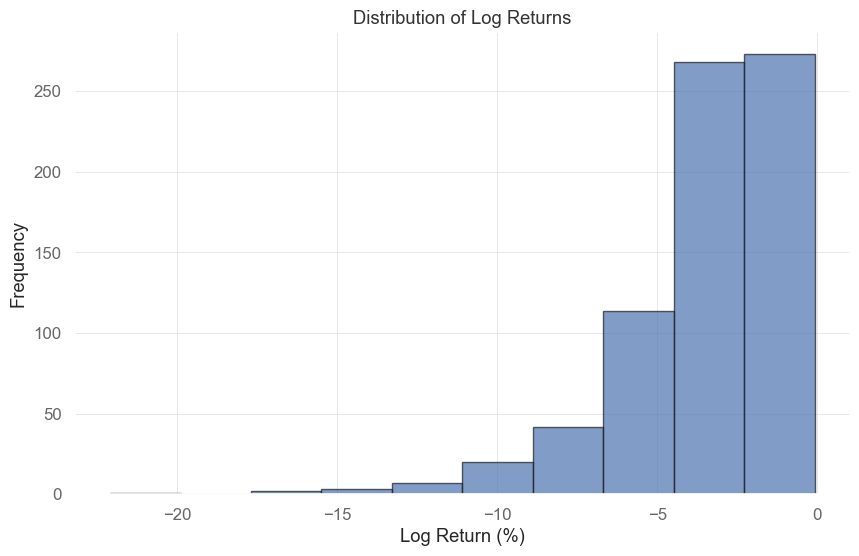

In [53]:
# Plot the distribution of log returns
plt.figure(figsize=(10, 6))
plt.hist(df['log_ret'].dropna(), bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Log Returns')
plt.xlabel('Log Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

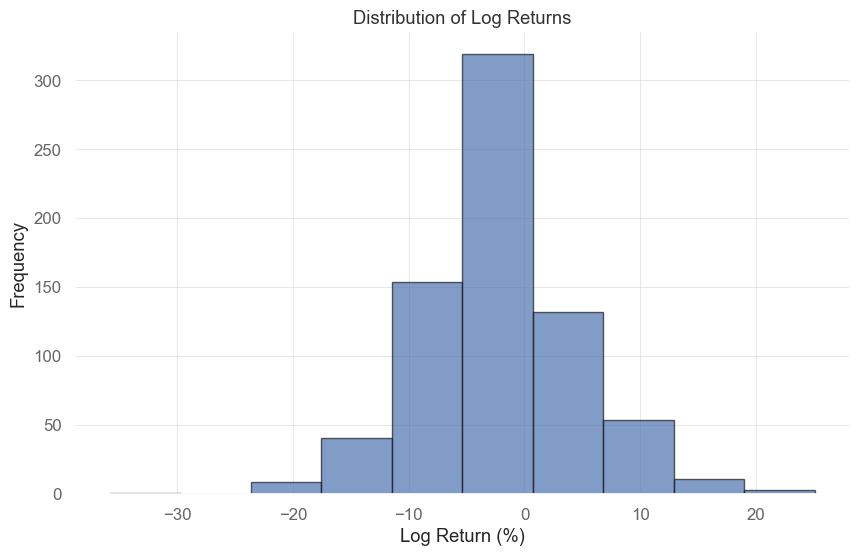

In [55]:
# Plot the distribution of log returns
plt.figure(figsize=(10, 6))
plt.hist(df['log_ret7'].dropna(), bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Log Returns')
plt.xlabel('Log Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


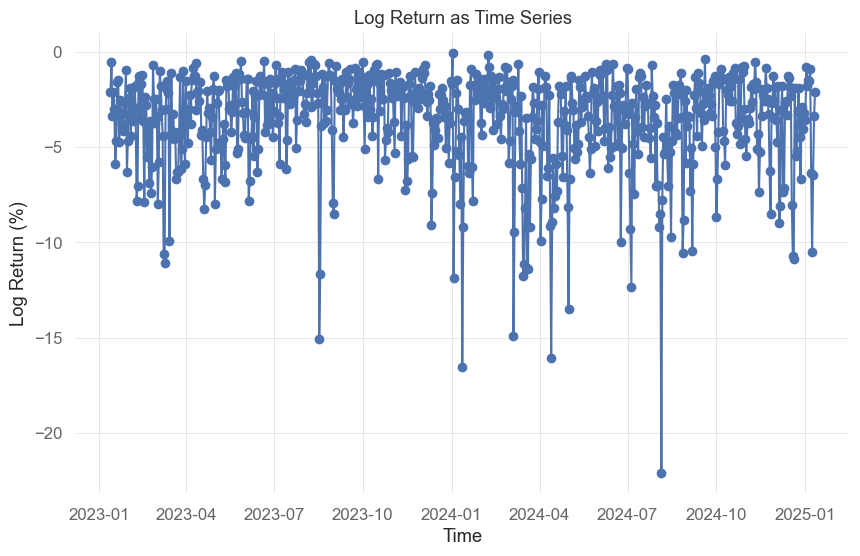

In [56]:
# Plot the log return as a time series
plt.figure(figsize=(10, 6))
plt.plot(df['log_ret'], marker='o', linestyle='-', color='b')
plt.title('Log Return as Time Series')
plt.xlabel('Time')
plt.ylabel('Log Return (%)')
plt.grid(True)
plt.show()